Źródło: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

Liczba próbek: 70692

Liczba cech: 21

Liczba klas: 2 (0, 1)

# Charakterestyka cech

- Diabetes_binary (Binary): 0 = no diabetes 1 = prediabetes or diabetes
- HighBP (Binary): 0 = no high BP 1 = high BP
- HighChol (Binary): 0 = no high cholesterol 1 = high cholesterol
- CholCheck (Binary): 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI (Integer): Body Mass Index
- Smoker (Binary): Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke (Binary): (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack (Binary): coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity (Binary): physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits (Binary): Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies (Binary): Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump (Binary): Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
- AnyHealthcare (Binary): Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost (Binary): Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth (Integer): Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor	
- MentHlth (Integer): Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
- PhysHlth (Integer): Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days	
- DiffWalk (Binary): Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex (Binary): 0 = female 1 = male
- Age (Integer): 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
- Education (Integer): Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
- Income (Integer): Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data: pd.DataFrame = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# sprawdzam w-ści brakujące
data[data.isnull().any(axis=1)]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [5]:
#sprawdzam duplikaty
data[data.duplicated()]

# duplikaty są, ale my nie mamy infotmacji o tym, czy to są powtarzające się dane tego samego człowieka więc to mogą być realne dane

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
69939,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
70305,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
70591,1.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


In [6]:
target = data['Diabetes_binary']
features = data.drop(columns = ['Diabetes_binary'])
features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [7]:
features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
target.describe()

count    70692.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Diabetes_binary, dtype: float64

In [9]:
# obliczam modę bo jest bez sensu obliczanie mediany z powodu że prawie wszystkie cechy są binarne więc moda pokazuje więcej informacji
features.mode()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0


In [10]:
target.mode()
#potwierdzam, że dane są zbalansowane 50/50

0    0.0
1    1.0
Name: Diabetes_binary, dtype: float64

/var/folders/sw/15jfdvr13_9gr4v82w317b7c0000gn/T/ipykernel_1298/4026593784.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[col], palette="Blues")
/var/folders/sw/15jfdvr13_9gr4v82w317b7c0000gn/T/ipykernel_1298/4026593784.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[col], palette="Blues")
/var/folders/sw/15jfdvr13_9gr4v82w317b7c0000gn/T/ipykernel_1298/4026593784.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[col], palette="Blues")
/var/folders/sw/15jfdvr13_9gr4v82w317b7c0000gn/T/ipykernel

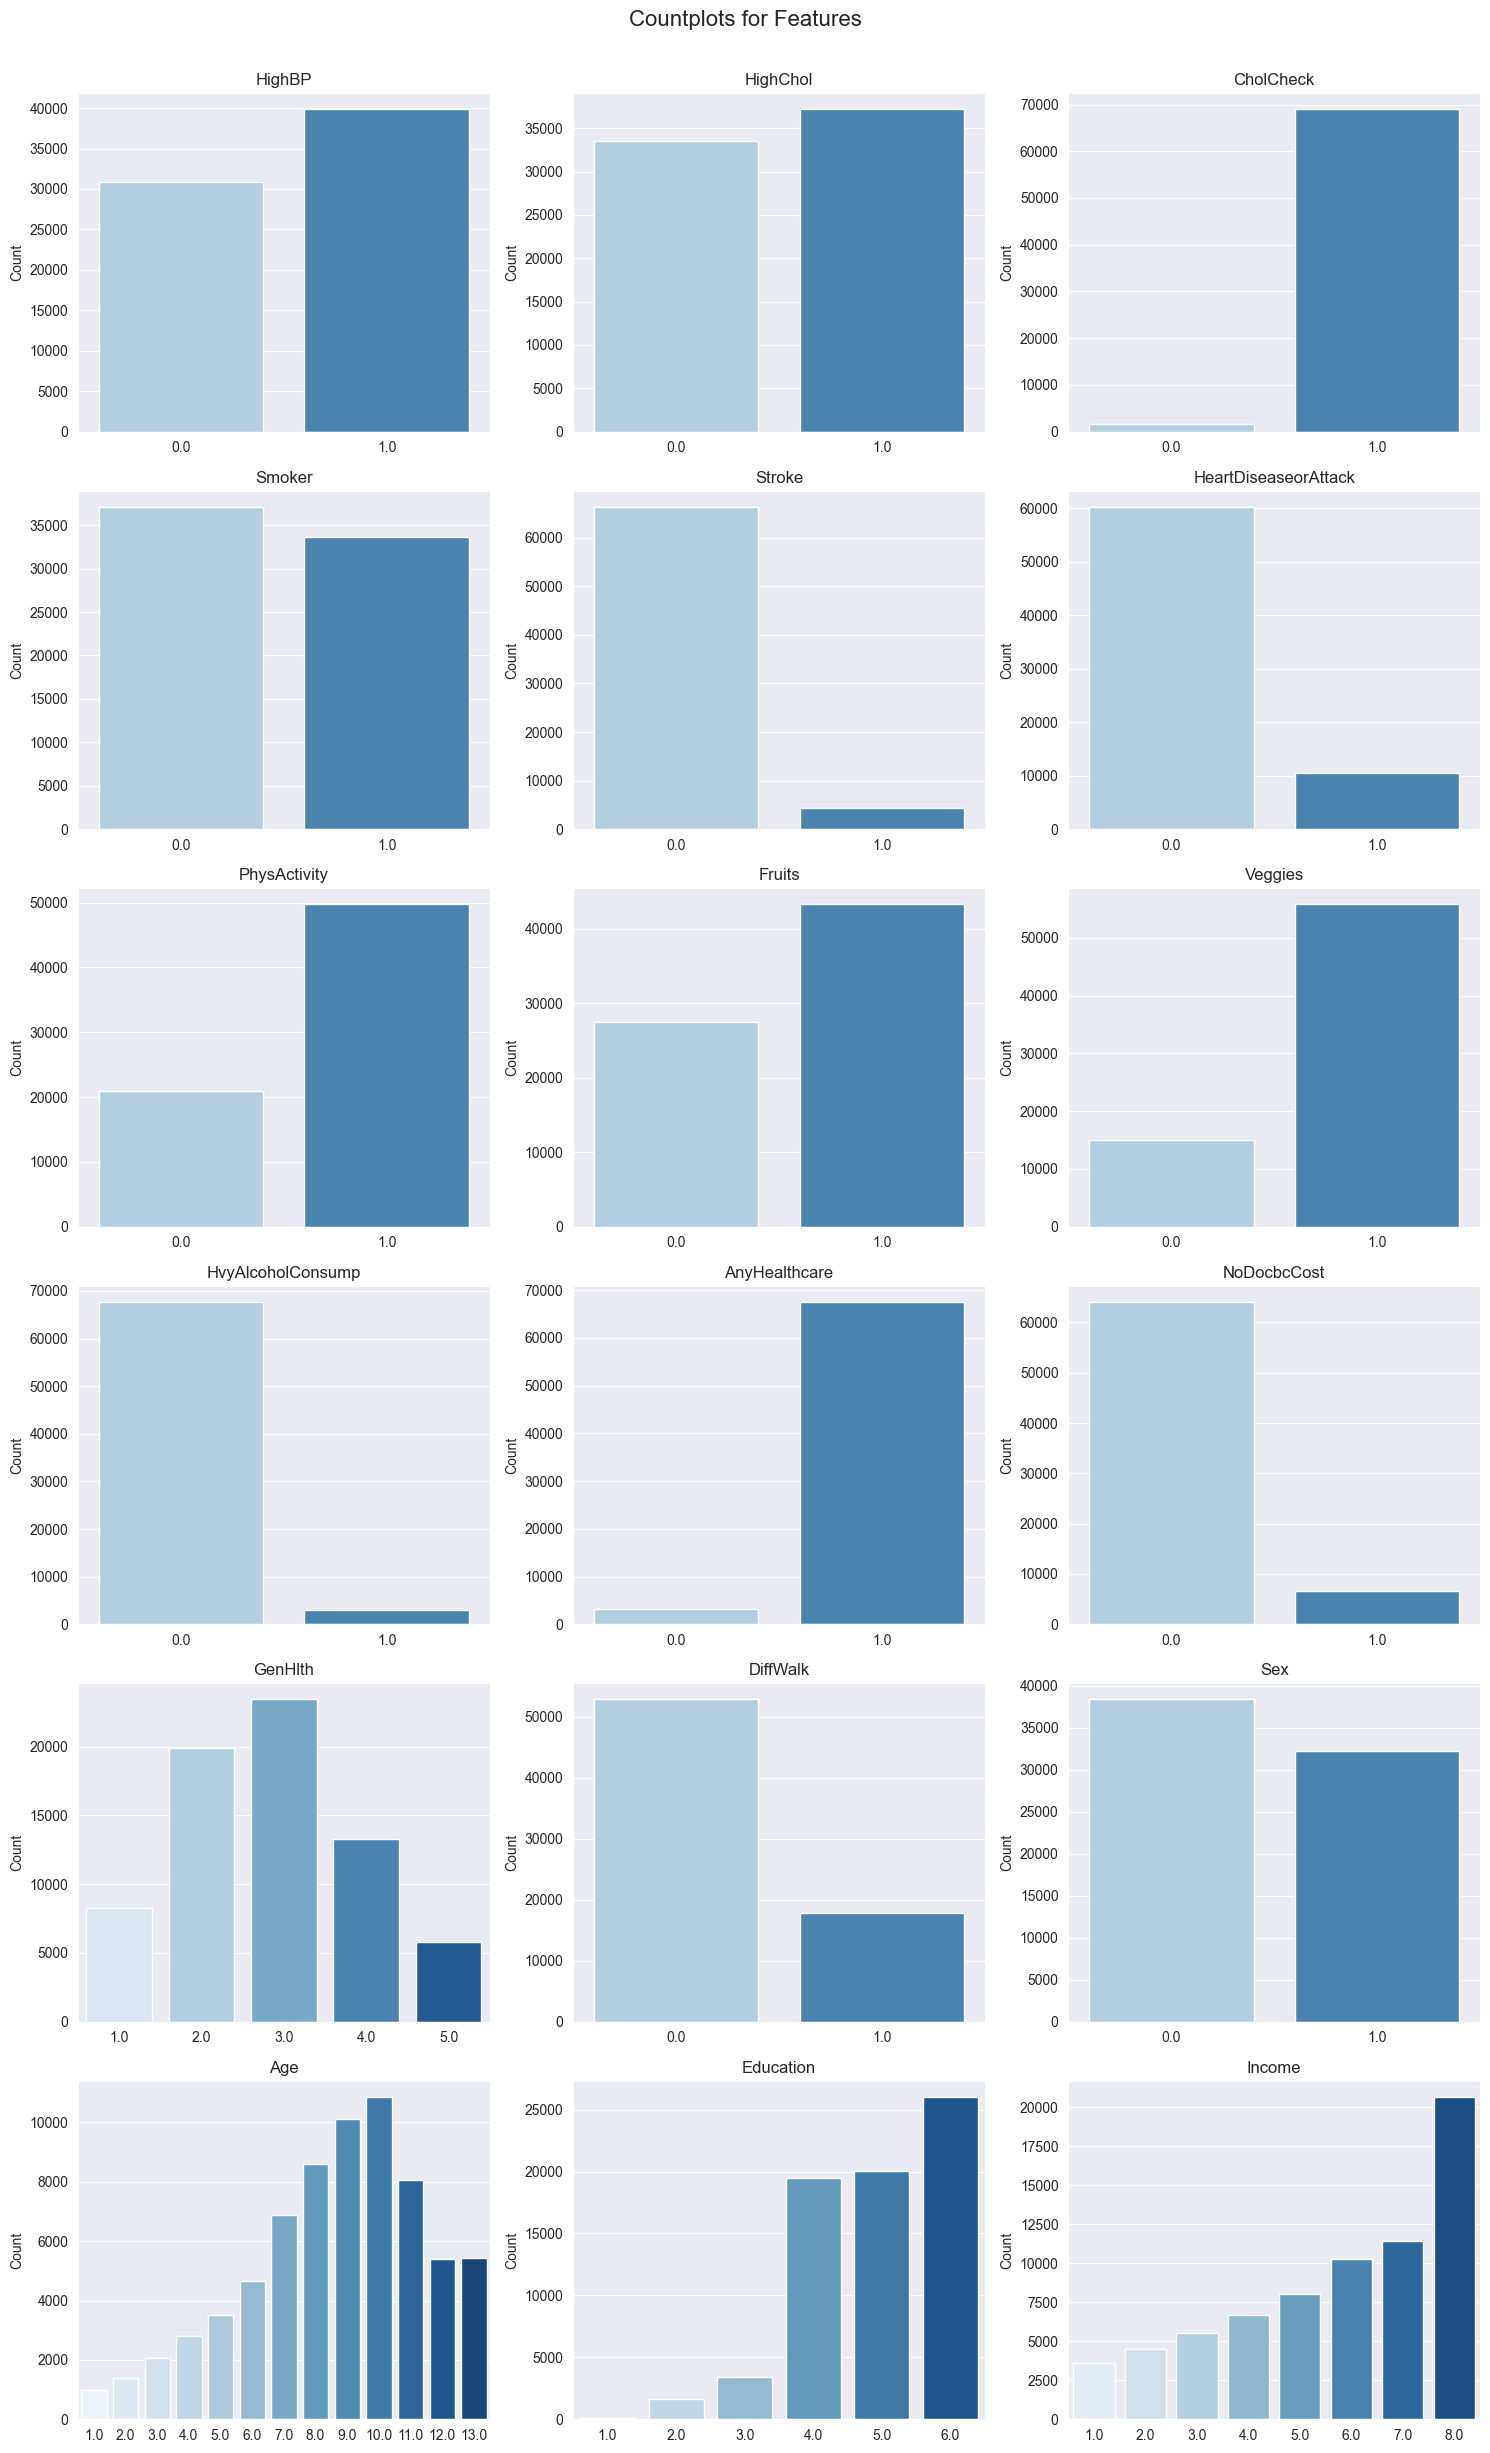

In [11]:
num_cols = features.columns.drop(['BMI', 'MentHlth', 'PhysHlth'])
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows*4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=features[col], palette="Blues")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle("Countplots for Features", fontsize=16, y=1.02)
plt.show()

/var/folders/sw/15jfdvr13_9gr4v82w317b7c0000gn/T/ipykernel_1298/3688063137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="Blues")


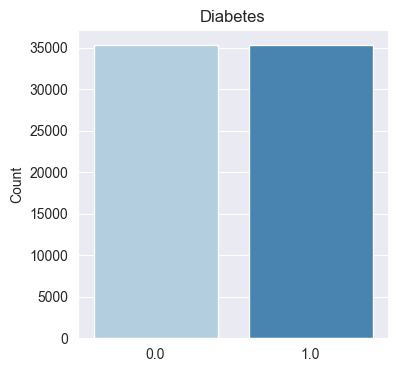

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(x=target, palette="Blues")
plt.title('Diabetes')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

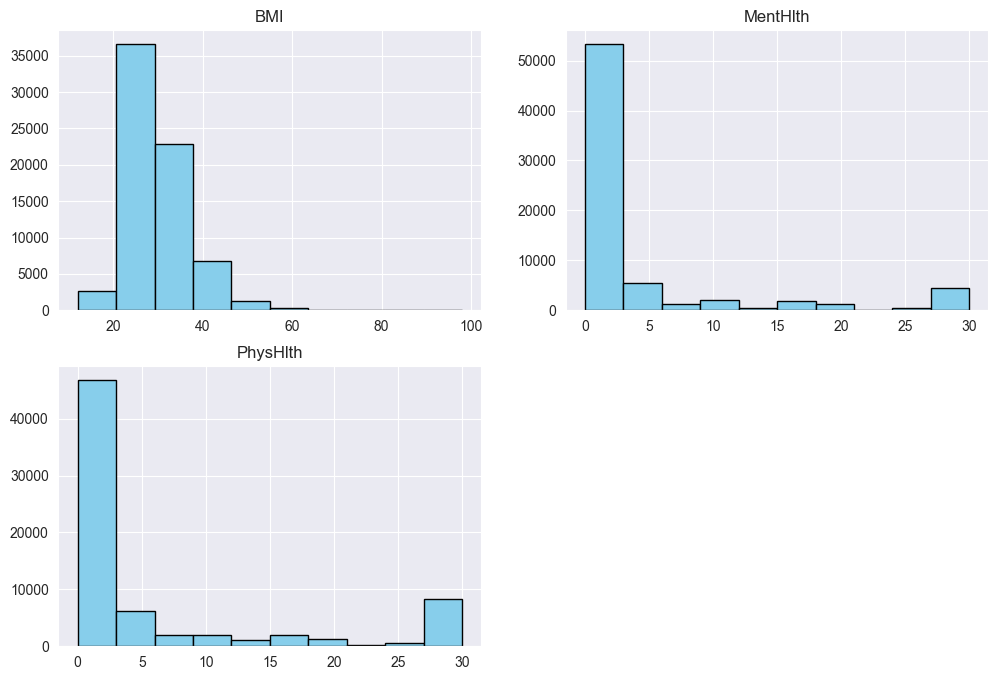

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
features['BMI'].hist(edgecolor='black', color='skyblue')
plt.title('BMI')

plt.subplot(2, 2, 2)
features['MentHlth'].hist(edgecolor='black', color='skyblue')
plt.title('MentHlth')

plt.subplot(2, 2, 3)
features['PhysHlth'].hist(edgecolor='black', color='skyblue')
plt.title('PhysHlth')

plt.show()

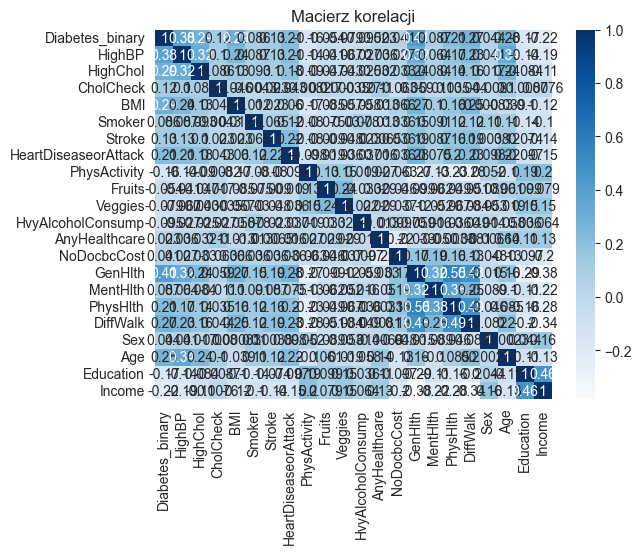

In [13]:
cols = data.columns
sns.heatmap(data[cols].corr(), annot=True, cmap='Blues')
plt.title("Macierz korelacji")
plt.show()
#nie ma szans o przeczytać, więc skracam

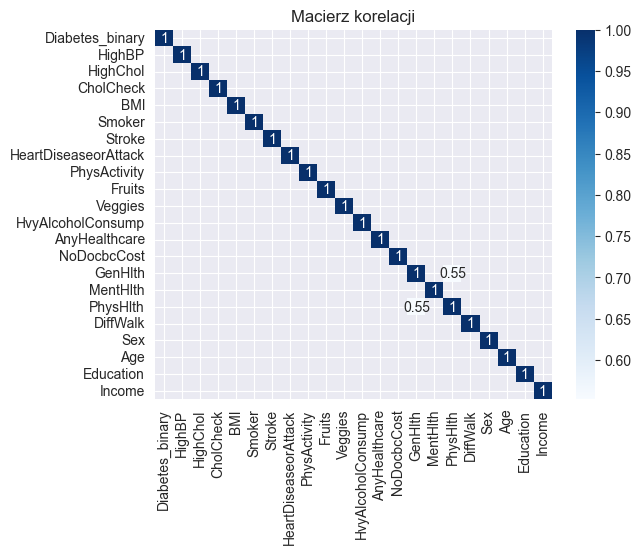

In [15]:
corr = data[cols].corr().where(data[cols].corr() > 0.5)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Macierz korelacji")
plt.show()

# Dużej korelacji nie ma, ale trzeba zwracać uwagę na GenHlth-PhysHlth

In [ ]:
# nic nie robię z outliers?